# Loan Approval Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('loan_prediction.csv', encoding='unicode_escape')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [6]:
df.isnull()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.shape

(480, 13)

In [11]:
df['CoapplicantIncome']=df['CoapplicantIncome'].astype(int)
df['LoanAmount']=df['LoanAmount'].astype(int)
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype(int)
df['Credit_History']=df['Credit_History'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            480 non-null    object
 1   Gender             480 non-null    object
 2   Married            480 non-null    object
 3   Dependents         480 non-null    object
 4   Education          480 non-null    object
 5   Self_Employed      480 non-null    object
 6   ApplicantIncome    480 non-null    int64 
 7   CoapplicantIncome  480 non-null    int64 
 8   LoanAmount         480 non-null    int64 
 9   Loan_Amount_Term   480 non-null    int64 
 10  Credit_History     480 non-null    int64 
 11  Property_Area      480 non-null    object
 12  Loan_Status        480 non-null    object
dtypes: int64(5), object(8)
memory usage: 52.5+ KB


In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.091667,144.735417,342.050000,0.854167
std,5668.251251,2617.692797,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y


# Exploratory Data Analysis

## Gender

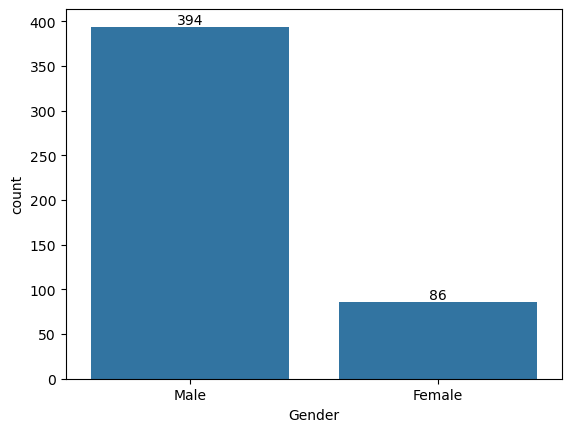

In [16]:
ax= sns.countplot(x='Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

* __*In short, Loan applied by men is higher than that by women.*__

<Axes: xlabel='Gender', ylabel='LoanAmount'>

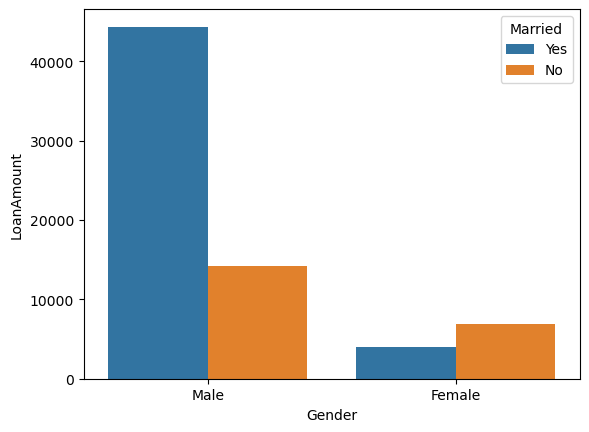

In [17]:
loan_gen = df.groupby (['Gender', 'Married'], as_index=False) ['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
sns.barplot(x = 'Gender',y='LoanAmount',hue='Married', data = loan_gen)

* __*We can clearly see that, men before marriage take loan lesser than that after marriage, whereas women after marriage take loan lesser. However loan amount of each state, men take a higher amount of loan*__

## Loan Status (Approval)

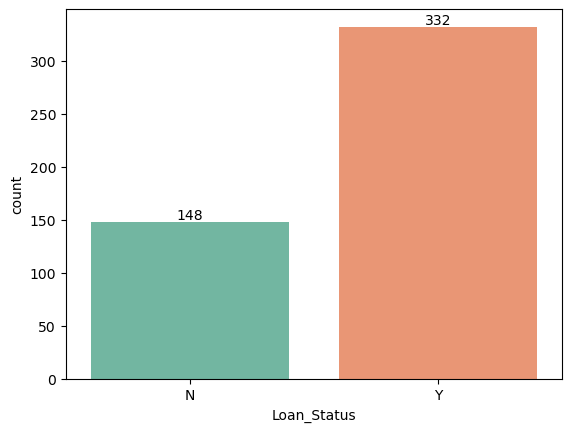

In [18]:
ax= sns.countplot(x= 'Loan_Status',data=df, palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

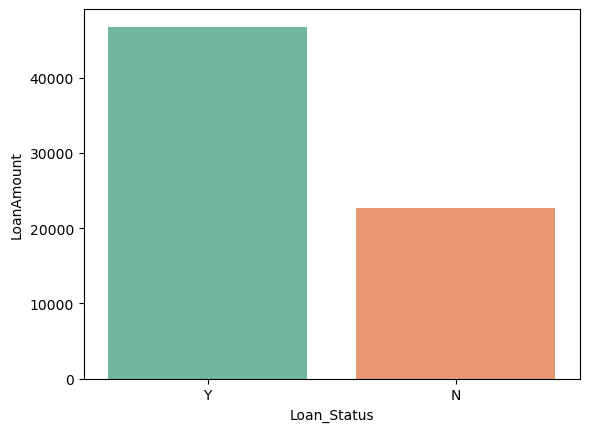

In [19]:
loan_sts = df.groupby (['Loan_Status'], as_index=False) ['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
sns.barplot(x = 'Loan_Status',y= 'LoanAmount' ,data = loan_sts, palette='Set2')

## Self Employed

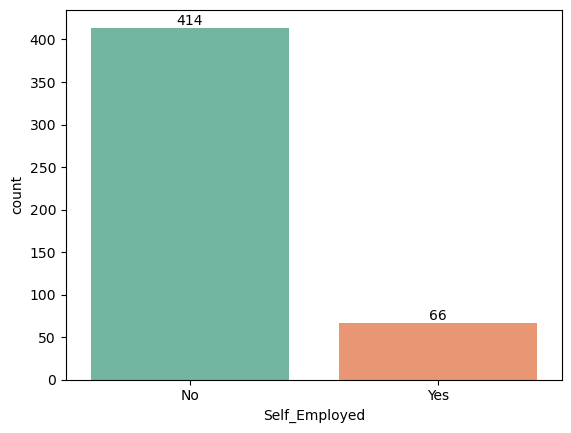

In [20]:
ax= sns.countplot(x= 'Self_Employed',data=df, palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

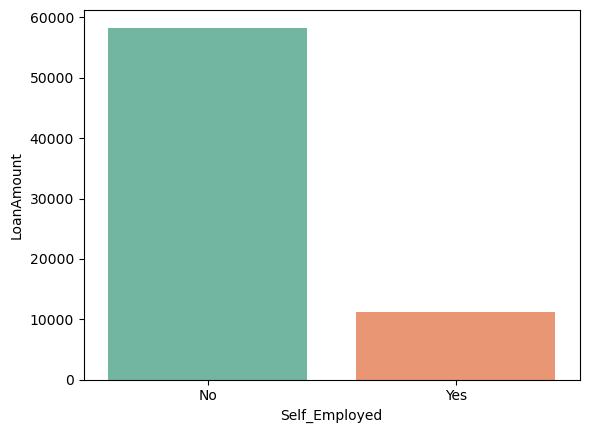

In [21]:
loan_empl = df.groupby (['Self_Employed'], as_index=False) ['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
sns.barplot(x = 'Self_Employed',y= 'LoanAmount' ,data = loan_empl, palette='Set2')

* __*People who are self-employed they tend to take loan less than those who are not into self employment, and the total amount of loan is also lower for the same reason.*__

## Marrital Status

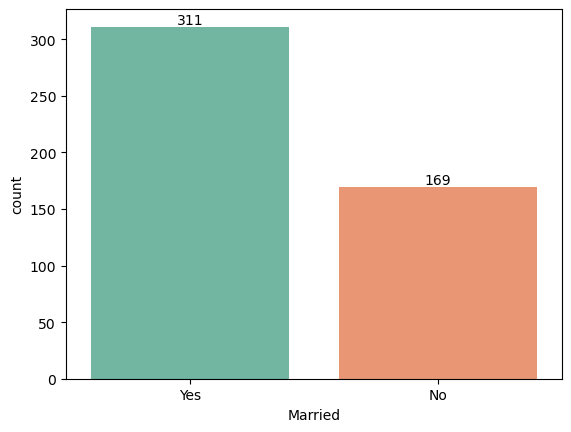

In [22]:
ax= sns.countplot(x= 'Married',data=df, palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Married', ylabel='LoanAmount'>

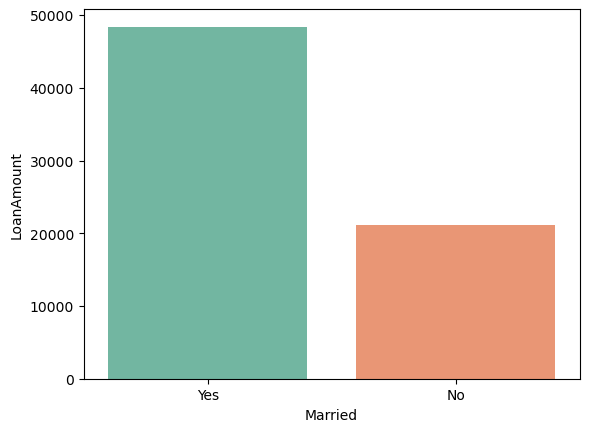

In [23]:
loan_marr = df.groupby (['Married'], as_index=False) ['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
sns.barplot(x = 'Married',y= 'LoanAmount' ,data = loan_marr, palette='Set2')

* __*Married people get more loan and the total loan amount is also higher as a consequence for marries individuals*__

## Education

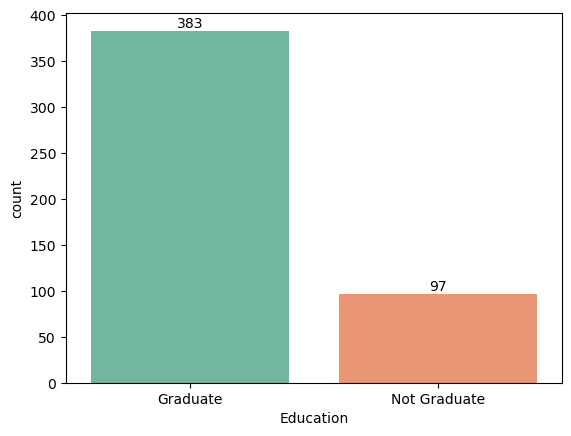

In [24]:
ax= sns.countplot(x= 'Education',data=df, palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Education', ylabel='LoanAmount'>

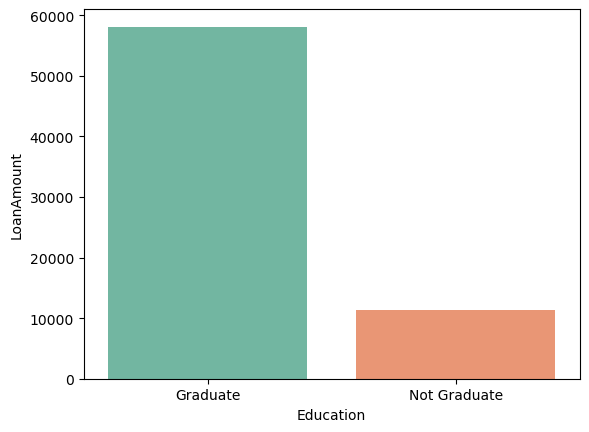

In [25]:
loan_edu = df.groupby (['Education'], as_index=False) ['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
sns.barplot(x = 'Education',y= 'LoanAmount' ,data = loan_edu, palette='Set2')

* __*Graduate people are supposed to take loan more than non-graduate people, that is why the total number of approved loan is also higher.*__

## Property Area

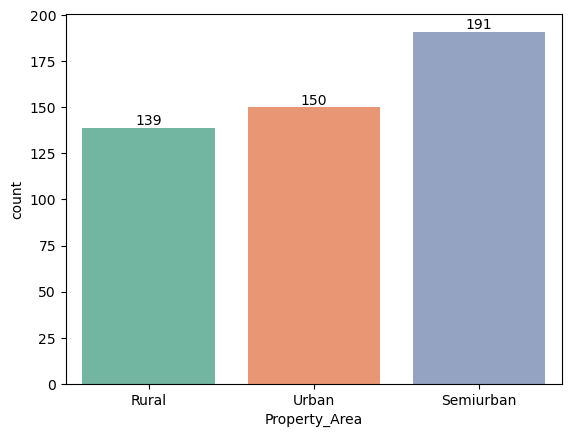

In [26]:
ax= sns.countplot(x= 'Property_Area',data=df, palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

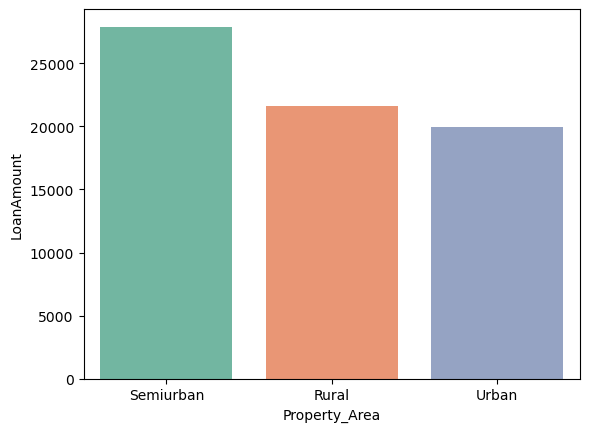

In [27]:
loan_prop = df.groupby (['Property_Area'], as_index=False) ['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
sns.barplot(x = 'Property_Area',y= 'LoanAmount' ,data = loan_prop, palette='Set2')

* __*The findings are quite interesting:*__

__1. Semi-urban people take more loan than urban people who take loan more than rural__

__2. Total loan taken by semi-urban is the maximum among the people of the all three property areas__

## Number of Dependents

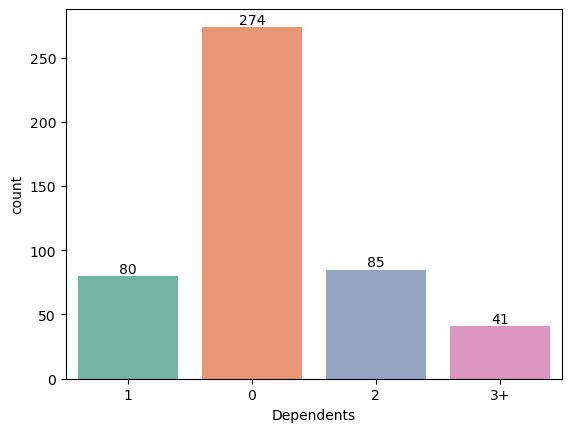

In [28]:
ax= sns.countplot(x= 'Dependents',data=df, palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

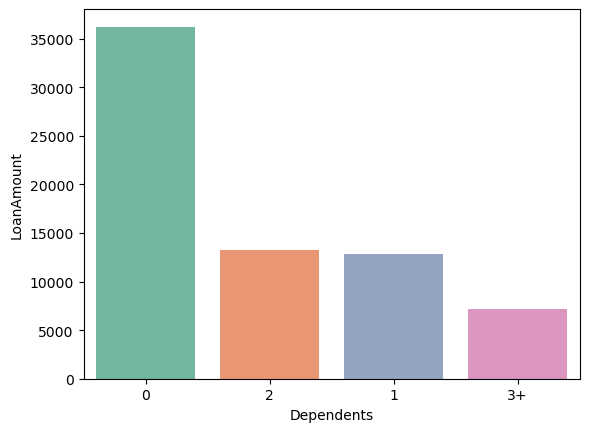

In [29]:
loan_dep = df.groupby (['Dependents'], as_index=False) ['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
sns.barplot(x = 'Dependents',y= 'LoanAmount' ,data = loan_dep, palette='Set2')

* __*People who have zero dependant are more eligible to get a loan, and consequently the total loan approval amount is also the highest for indivuals with no dependants on themselves.*__

## Applicant's Income

[Text(0.0, 0, '0'),
 Text(10000.0, 0, '10000'),
 Text(20000.0, 0, '20000'),
 Text(30000.0, 0, '30000'),
 Text(40000.0, 0, '40000'),
 Text(50000.0, 0, '50000'),
 Text(60000.0, 0, '60000'),
 Text(70000.0, 0, '70000'),
 Text(80000.0, 0, '80000'),
 Text(90000.0, 0, '90000')]

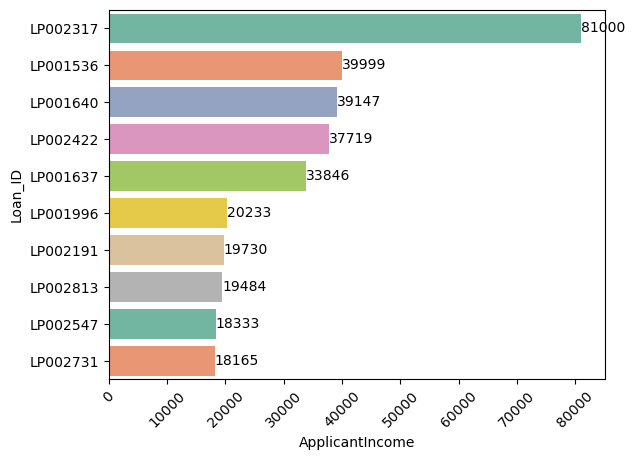

In [30]:
# Get top 10 rows with highest ApplicantIncome
top10_df = df.sort_values(by='ApplicantIncome', ascending=False).head(10)

# Plot
ax = sns.barplot(x='ApplicantIncome', y='Loan_ID', data=top10_df, palette='Set2')

# Add labels
for bars in ax.containers:
    ax.bar_label(bars)

# Rotate x labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)



[Text(0, 0, '18165'),
 Text(1, 0, '18333'),
 Text(2, 0, '19484'),
 Text(3, 0, '19730'),
 Text(4, 0, '20233'),
 Text(5, 0, '33846'),
 Text(6, 0, '37719'),
 Text(7, 0, '39147'),
 Text(8, 0, '39999'),
 Text(9, 0, '81000')]

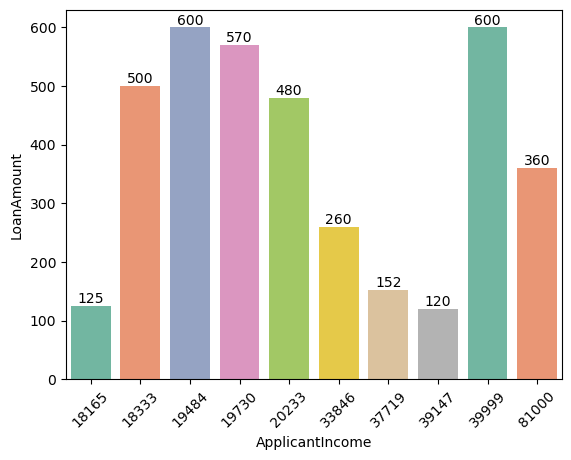

In [31]:
# Get top 10 rows with highest ApplicantIncome
top10_df = df.sort_values(by='ApplicantIncome', ascending=False).head(10)

# Plot
ax = sns.barplot(x='ApplicantIncome', y='LoanAmount', data=top10_df, palette='Set2')

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

# Rotate x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

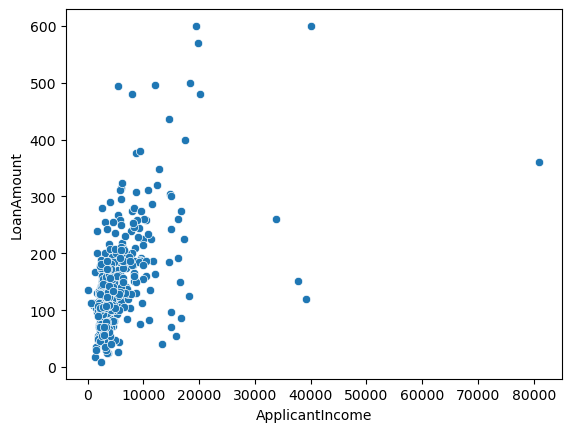

In [32]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)


* __*Applicant's income and Loan amount are highly and positively correlated*__

## Co-applicant's Income

[Text(0.0, 0, '0'),
 Text(5000.0, 0, '5000'),
 Text(10000.0, 0, '10000'),
 Text(15000.0, 0, '15000'),
 Text(20000.0, 0, '20000'),
 Text(25000.0, 0, '25000'),
 Text(30000.0, 0, '30000'),
 Text(35000.0, 0, '35000'),
 Text(40000.0, 0, '40000')]

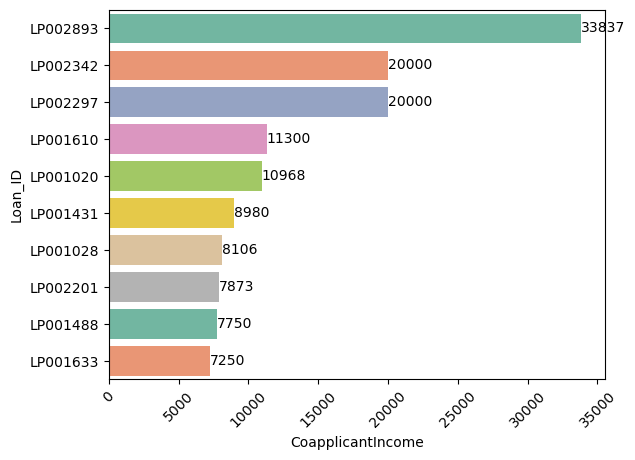

In [33]:
# Get top 10 rows with highest ApplicantIncome
top10_df = df.sort_values(by='CoapplicantIncome', ascending=False).head(10)

# Plot
ax = sns.barplot(x='CoapplicantIncome', y='Loan_ID', data=top10_df, palette='Set2')

# Add labels
for bars in ax.containers:
    ax.bar_label(bars)

# Rotate x labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, '7250'),
 Text(1, 0, '7750'),
 Text(2, 0, '7873'),
 Text(3, 0, '8106'),
 Text(4, 0, '8980'),
 Text(5, 0, '10968'),
 Text(6, 0, '11300'),
 Text(7, 0, '20000'),
 Text(8, 0, '33837')]

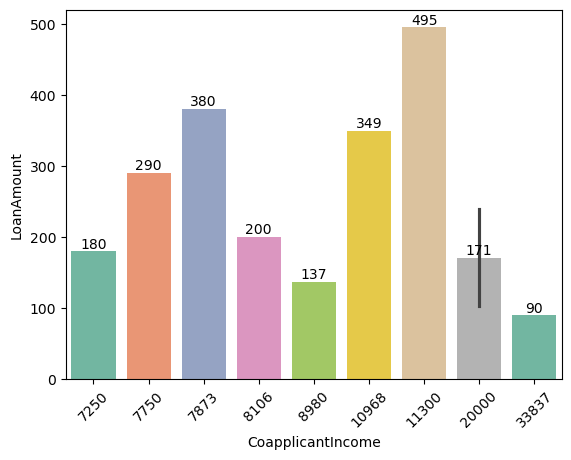

In [34]:
# Get top 10 rows with highest Co-applicantIncome
top10_df = df.sort_values(by='CoapplicantIncome', ascending=False).head(10)

# Plot
ax = sns.barplot(x='CoapplicantIncome', y='LoanAmount', data=top10_df, palette='Set2')

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

# Rotate x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

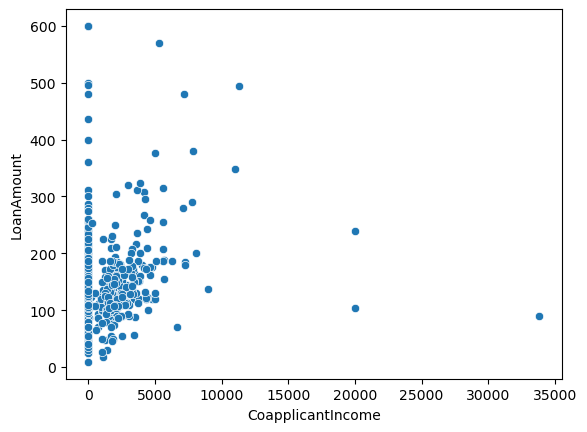

In [35]:
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', data=df)



* __*More or less we can conclude from the above that, Co-applicant's income does not influence loan approval*__

## Loan Amount Term

[Text(0.0, 0, '0'),
 Text(100.0, 0, '100'),
 Text(200.0, 0, '200'),
 Text(300.0, 0, '300'),
 Text(400.0, 0, '400'),
 Text(500.0, 0, '500'),
 Text(600.0, 0, '600')]

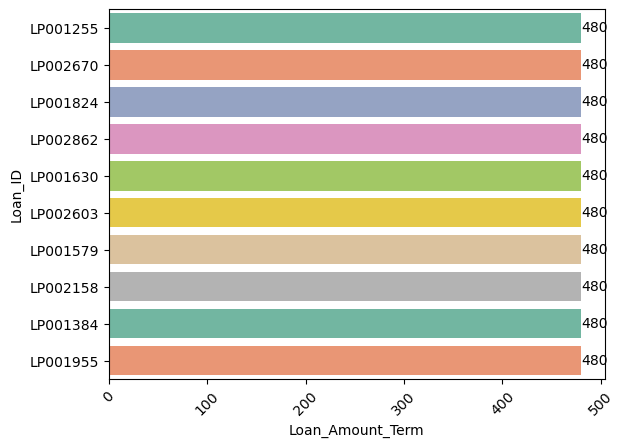

In [36]:
# Get top 10 rows with highest Loan Amount Term
top10_df = df.sort_values(by='Loan_Amount_Term', ascending=False).head(10)

# Plot
ax = sns.barplot(x='Loan_Amount_Term', y='Loan_ID', data=top10_df, palette='Set2')

# Add labels
for bars in ax.containers:
    ax.bar_label(bars)

# Rotate x labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, '480')]

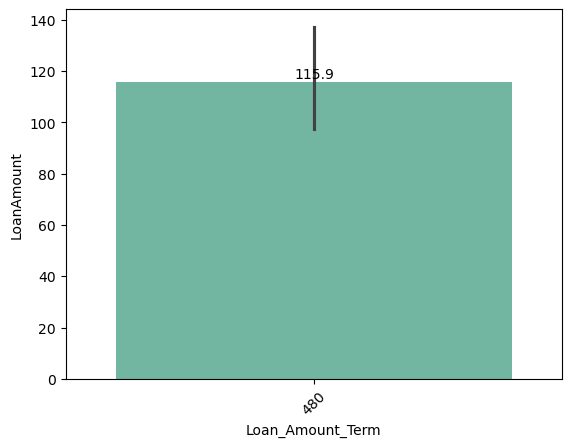

In [37]:
# Get top 10 rows with highest Loan Amount Term
top10_df = df.sort_values(by='Loan_Amount_Term', ascending=False).head(10)

# Plot
ax = sns.barplot(x='Loan_Amount_Term', y='LoanAmount', data=top10_df, palette='Set2')

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

# Rotate x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

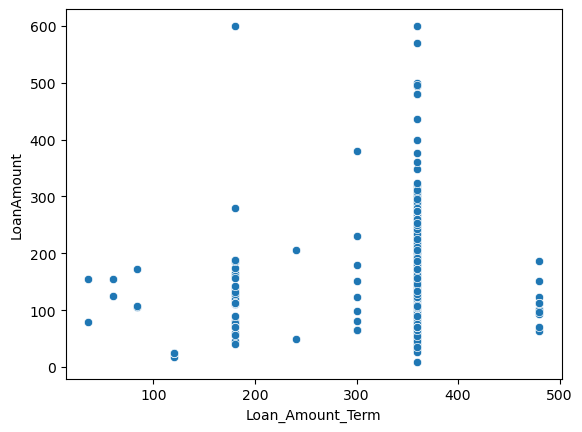

In [38]:
sns.scatterplot(x='Loan_Amount_Term', y='LoanAmount', data=df)


## Credit History

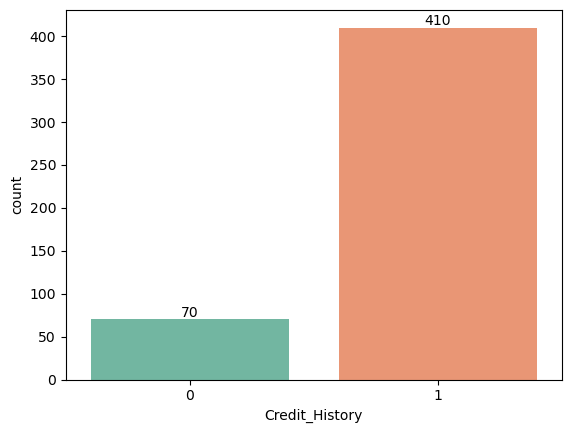

In [39]:
ax= sns.countplot(x= 'Credit_History',data=df, palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Credit_History', ylabel='LoanAmount'>

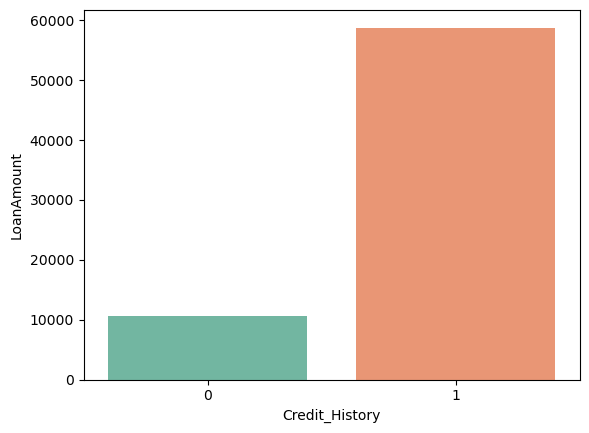

In [40]:
loan_cred_his = df.groupby (['Credit_History'], as_index=False) ['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
sns.barplot(x = 'Credit_History',y= 'LoanAmount' ,data = loan_cred_his, palette='Set2')


* __*People with a credit history are more eligible to get a loan and the total approved loan amount is also higher than people with no credit history.*__

## Conclusion:
1. *In short, Loan applied by men is higher than that by women.*
2. *People who are self-employed they tend to take loan more than those who are not into self employment, and the total amount of loan is also higher for the same reason.*
3. *Married people get more loan and the total loan amount is also higher as a consequence for marries individuals.*
4. *We can clearly see that, men before marriage take loan lesser than that after marriage, whereas women after marriage take loan lesser. However loan amount of each state, men take a higher amount of loan.*
5. *People who are self-employed they tend to take loan more than those who are not into self employment, and the total amount of loan is also higher for the same reason.*
6. *Married people get more loan and the total loan amount is also higher as a consequence for marries individuals.*
7. *Graduate people are supposed to take loan more than non-graduate people, that is why the total number of approved loan is also higher.*
8. *The findings are quite interesting:*
 a. Semi-urban people take more loan than urban people who take loan more thanrural;
 b. Total loan taken by semi-urban is the maximum among the people of the all three property areas.
9. *People who have zero dependant are more eligible to get a loan, and consequently the total loan approval amount is also the highest for indivuals with no dependants on themselves.*
10. *More or less we can conclude from the above that, Co-applicant's income does not influence loan approval.*
11. *More or less we can conclude from the above that, Co-applicant's income does not influence loan approval.*
12. *People with a credit history are more eligible to get a loan and the total approved loan amount is also higher than people with no credit history.*